In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Create output directory
outdir = "plots"
if not os.path.exists(outdir):
    os.makedirs(outdir)

In [29]:
def load_timing_data():
    """Load timing data from CSV files"""
    
    # Load the CSV files
    bridge_df = pd.read_csv("Video Analysis - Timings_Bridge.csv")
    laptop_df = pd.read_csv("Video Analysis - Timings_Laptop.csv")

    # Change order so that 'MIDI Connection' comes after 'OSC Configuration'
    if 'MIDI Connection' in bridge_df.columns:
        # Change order
        bridge_df = bridge_df[['Device', 'Room', 'Bootstrap', 'WiFi Config', 'OSC Configuration', 'MIDI Connection', 'Wifi+OSC', 'Tot']]
    if 'MIDI Connection' in laptop_df.columns:
        # Change order
        laptop_df = laptop_df[['Device', 'Room', 'Bootstrap', 'WiFi Config', 'OSC Configuration', 'MIDI Connection', 'Wifi+OSC', 'Tot']]

    
    # Combine data with device labels
    bridge_df['Device'] = 'Bridge'
    laptop_df['Device'] = 'Laptop'
    
    return bridge_df, laptop_df

def calculate_stats(data, columns):
    """Calculate mean and standard error for specified columns"""
    means = data[columns].mean()
    std_errors = data[columns].sem()  # Standard error of the mean
    return means, std_errors

In [33]:
# Load data
bridge_data, laptop_data = load_timing_data()

print(f"Loaded {len(bridge_data)} bridge measurements and {len(laptop_data)} laptop measurements")

# Define timing columns
all_timing_columns = ['Bootstrap', 'WiFi Config', 'OSC Configuration', 'MIDI Connection']
selected_timing_columns = ['Bootstrap', 'Wifi+OSC', 'MIDI Connection', 'Tot']

matplotlib_boldtext = lambda text: r'$\bf{' + text + r'}$'

label_names = {
    'Bootstrap': 'Bootstrap',
    'WiFi Config': 'WiFi\nConfiguration',
    'OSC Configuration': 'OSC\nConfiguration',
    'MIDI Connection': 'MIDI\nConnection',
    'Wifi+OSC': 'Configuration\n(WiFi+OSC)',
    'Tot': matplotlib_boldtext('Total')
}

# Calculate statistics for all timing columns
bridge_means_all, bridge_errors_all = calculate_stats(bridge_data, all_timing_columns)
laptop_means_all, laptop_errors_all = calculate_stats(laptop_data, all_timing_columns)

# Print summary statistics
print("\n=== TIMING STATISTICS (All Columns) ===")
print("\nBridge Averages:")
for i, (col, mean) in enumerate(bridge_means_all.items()):
    print(f"{i+1:2d}. {col}: {mean:.2f} ± {bridge_errors_all.iloc[i]:.2f} seconds")

print("\nLaptop Averages:")
for i, (col, mean) in enumerate(laptop_means_all.items()):
    print(f"{i+1:2d}. {col}: {mean:.2f} ± {laptop_errors_all.iloc[i]:.2f} seconds")

Loaded 10 bridge measurements and 10 laptop measurements

=== TIMING STATISTICS (All Columns) ===

Bridge Averages:
 1. Bootstrap: 34.80 ± 3.97 seconds
 2. WiFi Config: 133.80 ± 20.76 seconds
 3. OSC Configuration: 51.90 ± 22.07 seconds
 4. MIDI Connection: 28.60 ± 16.90 seconds

Laptop Averages:
 1. Bootstrap: 107.90 ± 9.92 seconds
 2. WiFi Config: 25.80 ± 3.69 seconds
 3. OSC Configuration: 38.10 ± 6.56 seconds
 4. MIDI Connection: 117.00 ± 24.41 seconds



Creating complete timing comparison plot...


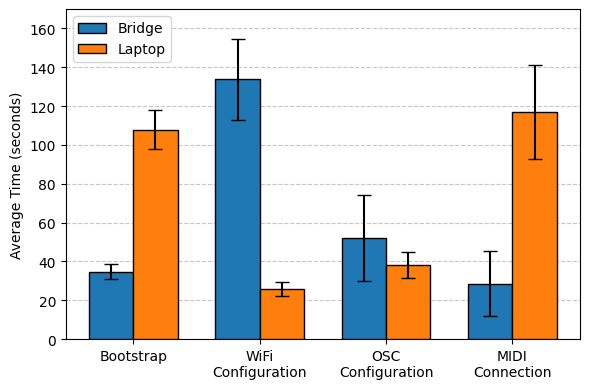

In [34]:
# Plot 1: All timing columns comparison
print("\nCreating complete timing comparison plot...")

x = np.arange(len(all_timing_columns))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 4))
ax.yaxis.grid(True, linestyle='--', alpha=0.7, zorder=-1)

bars1 = ax.bar(x - width/2, bridge_means_all, width, label='Bridge', edgecolor='black', 
               yerr=bridge_errors_all, capsize=5, zorder=100)
bars2 = ax.bar(x + width/2, laptop_means_all, width, label='Laptop', edgecolor='black', 
               yerr=laptop_errors_all, capsize=5, zorder=100)

ax.set_ylabel('Average Time (seconds)')
ax.set_xticks(x)
ax.set_xticklabels([label_names[e] for e in all_timing_columns], ha='center')
ax.legend(loc='upper left')
ax.set_ylim(0, max(max(bridge_means_all + bridge_errors_all), 
                   max(laptop_means_all + laptop_errors_all)) * 1.1)

plt.tight_layout()
plt.savefig(os.path.join(outdir, "timing_all.pdf"), dpi=300, bbox_inches='tight')
plt.show()


=== TIMING STATISTICS (Selected Columns) ===

Bridge Averages:
 1. Bootstrap: 34.80 ± 3.97 seconds
 2. Wifi+OSC: 185.70 ± 35.91 seconds
 3. MIDI Connection: 28.60 ± 16.90 seconds
 4. Tot: 249.10 ± 52.07 seconds

Laptop Averages:
 1. Bootstrap: 107.90 ± 9.92 seconds
 2. Wifi+OSC: 63.90 ± 8.53 seconds
 3. MIDI Connection: 117.00 ± 24.41 seconds
 4. Tot: 288.80 ± 35.32 seconds

Creating selected timing comparison plot...


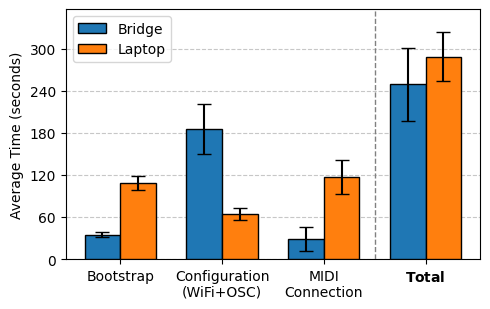


Plots saved to 'plots' directory!


In [35]:

# Calculate statistics for selected timing columns
bridge_means_sel, bridge_errors_sel = calculate_stats(bridge_data, selected_timing_columns)
laptop_means_sel, laptop_errors_sel = calculate_stats(laptop_data, selected_timing_columns)

print("\n=== TIMING STATISTICS (Selected Columns) ===")
print("\nBridge Averages:")
for i, (col, mean) in enumerate(bridge_means_sel.items()):
    print(f"{i+1:2d}. {col}: {mean:.2f} ± {bridge_errors_sel.iloc[i]:.2f} seconds")

print("\nLaptop Averages:")
for i, (col, mean) in enumerate(laptop_means_sel.items()):
    print(f"{i+1:2d}. {col}: {mean:.2f} ± {laptop_errors_sel.iloc[i]:.2f} seconds")

# Plot 2: Selected timing columns comparison
print("\nCreating selected timing comparison plot...")

x = np.arange(len(selected_timing_columns))
width = 0.35

fig, ax = plt.subplots(figsize=(5, 3.2))
ax.yaxis.grid(True, linestyle='--', alpha=0.7, zorder=-1)


bars1 = ax.bar(x - width/2, bridge_means_sel, width, label='Bridge', edgecolor='black', 
               yerr=bridge_errors_sel, capsize=5, zorder=100)
bars2 = ax.bar(x + width/2, laptop_means_sel, width, label='Laptop', edgecolor='black', 
               yerr=laptop_errors_sel, capsize=5, zorder=100)

# // Dashed vertical line between the last two bars
ax.axvline((x[-2]+x[-1])/2, color='gray', linestyle='--', linewidth=1, zorder=50)

ax.set_ylabel('Average Time (seconds)')
ax.set_xticks(x)
ax.set_xticklabels([label_names[e] for e in selected_timing_columns], ha='center')
ax.legend(loc='upper left')
ax.set_ylim(0, max(max(bridge_means_sel + bridge_errors_sel), 
                   max(laptop_means_sel + laptop_errors_sel)) * 1.1)

yticks_mins = np.arange(0, ax.get_ylim()[1], 60)
ax.set_yticks(yticks_mins)
# ax.set_yticklabels([f"{int(t)} ({int(t/60)}')" for t in yticks_mins], fontsize=10)

plt.tight_layout()
plt.savefig(os.path.join(outdir, "timing_compact.pdf"), dpi=300, bbox_inches='tight')
plt.show()

print("\nPlots saved to 'plots' directory!")